In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## I. Univariate Analysis (Individual Variables)

### What is the average age of the individuals in the dataset?

In [32]:
df.age.mean()

np.float64(39.20702541106129)

### What is the distribution of BMI? Does it follow a normal distribution (bell curve)?

<Axes: xlabel='bmi', ylabel='Count'>

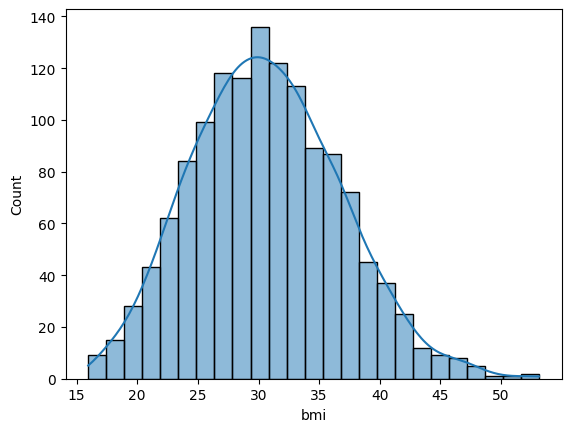

In [34]:
sns.histplot(df["bmi"],kde=True)

### How many individuals are smokers vs. non-smokers?

In [49]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

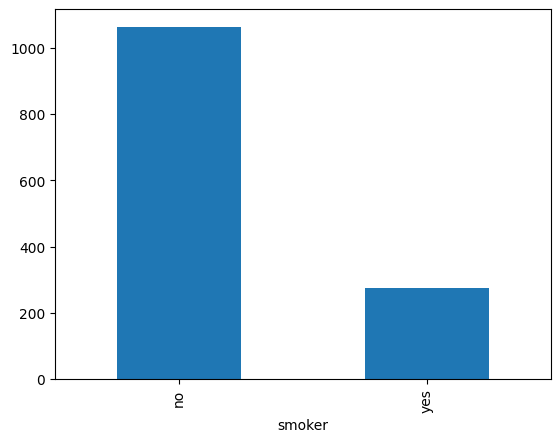

In [48]:
df.smoker.value_counts().plot(kind="bar")

### What is the most common region represented in the data?

## SouthEast

<Axes: xlabel='region'>

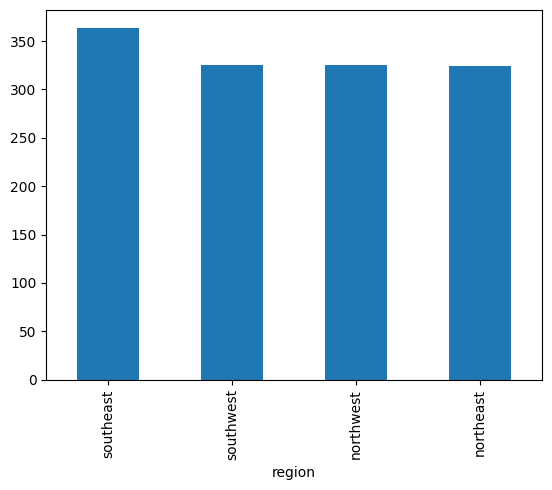

In [53]:
df.region.value_counts().plot(kind="bar")

### What is the range (Min to Max) of the medical charges?

<Axes: ylabel='charges'>

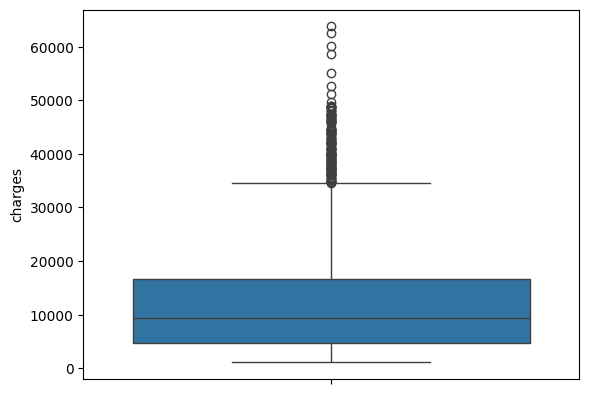

In [60]:
sns.boxplot(df["charges"])

### How many people have zero children?

In [82]:
(df.children == 0).sum()

np.int64(574)

<Axes: xlabel='children', ylabel='count'>

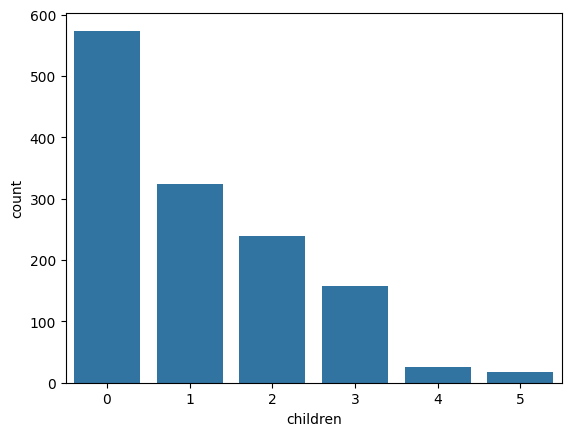

In [69]:
sns.countplot(x=df["children"])

### Are there any outliers in the "Charges" column? (Use a boxplot).

<Axes: ylabel='charges'>

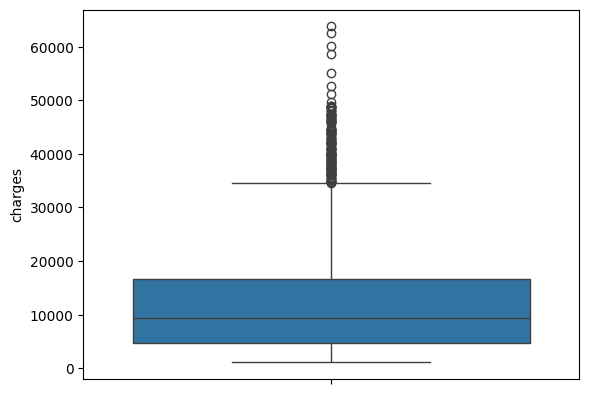

In [70]:
sns.boxplot(df.charges)

### What is the median BMI for the entire group?

In [72]:
df.bmi.median()

np.float64(30.4)

### Is the Sex variable balanced (roughly 50/50 male/female)?

sex
male      676
female    662
Name: count, dtype: int64


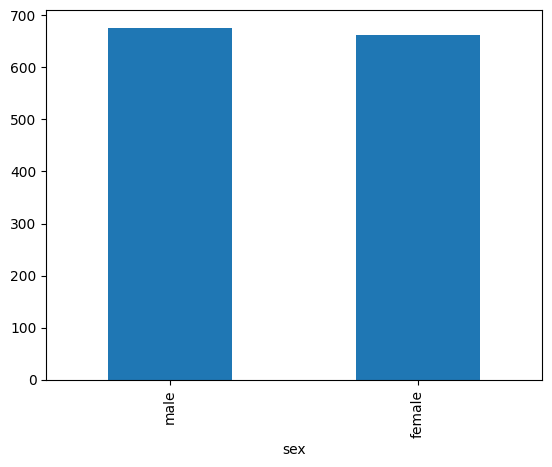

In [77]:
df.sex.value_counts().plot(kind="bar")
print(df.sex.value_counts())

### What is the skewness of the "Charges" variable? (Is it right-skewed?)

This is Left-Skewed


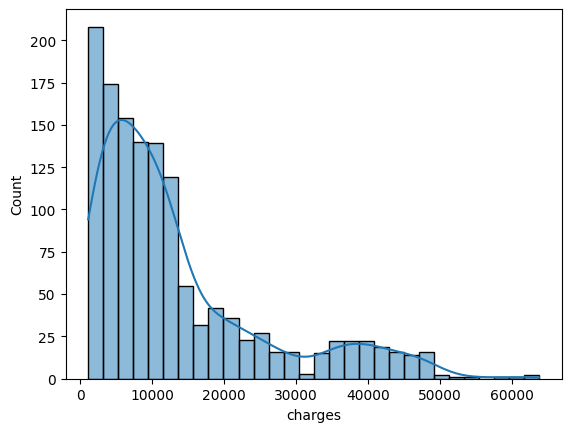

In [79]:
sns.histplot(df.charges,kde=True)
print("This is Left-Skewed")

## II. Bivariate Analysis (Two-Variable Relationships)

### Is there a visual correlation between Age and Charges?

<Axes: xlabel='age', ylabel='charges'>

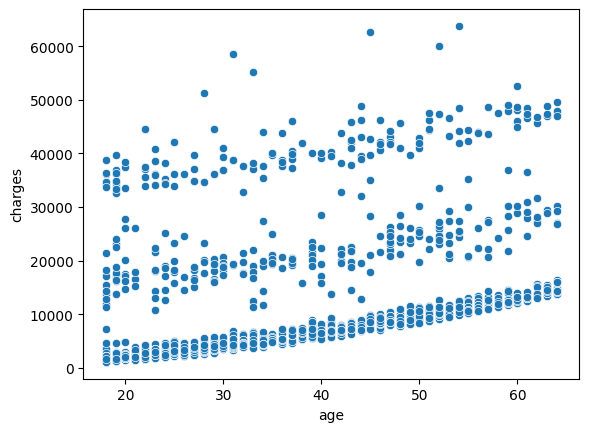

In [89]:
sns.scatterplot(df,x="age",y="charges")

### Do Smokers pay significantly higher Charges than non-smokers?

<Axes: xlabel='smoker', ylabel='charges'>

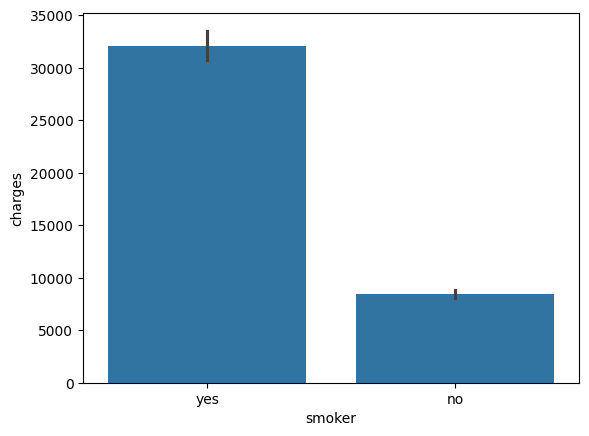

In [95]:
sns.barplot(df,x="smoker",y="charges")

### How does BMI differ between Males and Females?

<Axes: xlabel='sex', ylabel='bmi'>

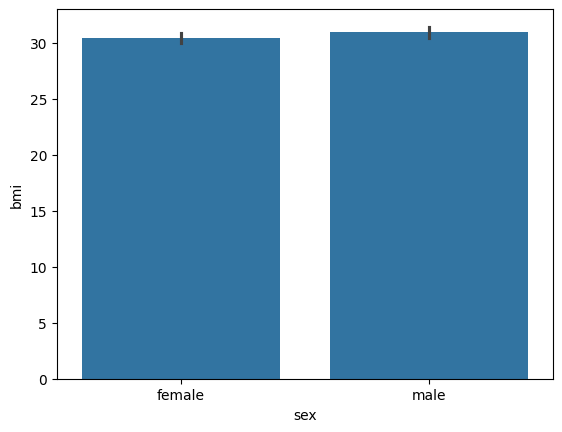

In [98]:
sns.barplot(df,x="sex",y="bmi")

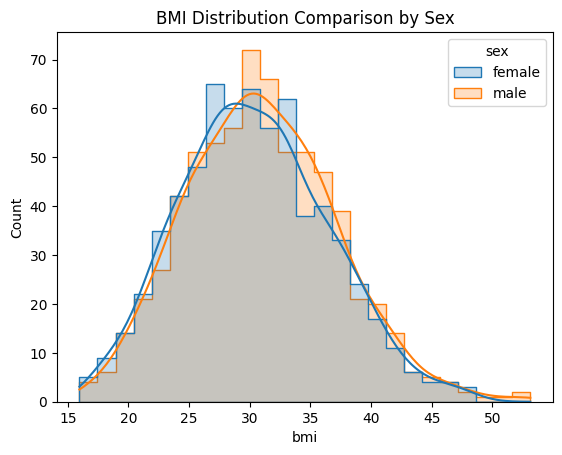

In [105]:
sns.histplot(df, x="bmi", hue="sex", element="step", kde=True)
plt.title("BMI Distribution Comparison by Sex")
plt.show()

### Is there a relationship between the number of Children and the total Charges?

In [114]:
df.groupby("children")["charges"].mean().sort_values(ascending=False)

children
3    15355.318367
2    15073.563734
4    13850.656311
1    12731.171832
0    12365.975602
5     8786.035247
Name: charges, dtype: float64

<Axes: xlabel='children', ylabel='charges'>

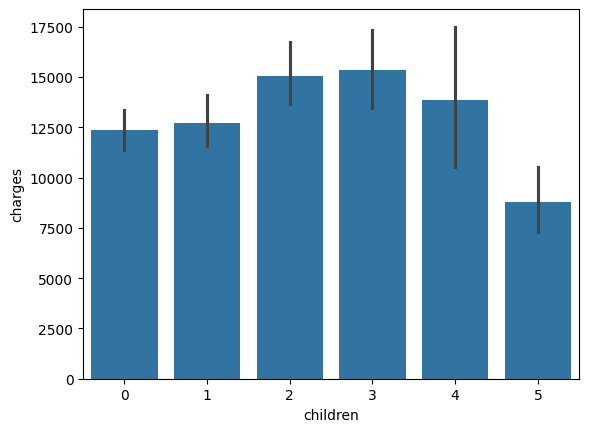

In [107]:
sns.barplot(df,x="children",y="charges")

### Which Region has the highest average medical costs?

In [133]:
df.groupby("region")["charges"].mean().idxmax()

'southeast'

<Axes: xlabel='region', ylabel='charges'>

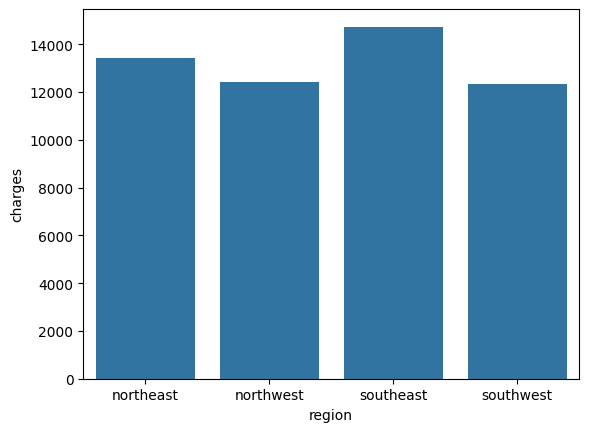

In [134]:
res = df.groupby("region")["charges"].mean().reset_index()
sns.barplot(data=res, x="region", y="charges")

### Create a scatter plot of BMI vs. Charges: Do you see any distinct "groups" forming?

<Axes: xlabel='bmi', ylabel='charges'>

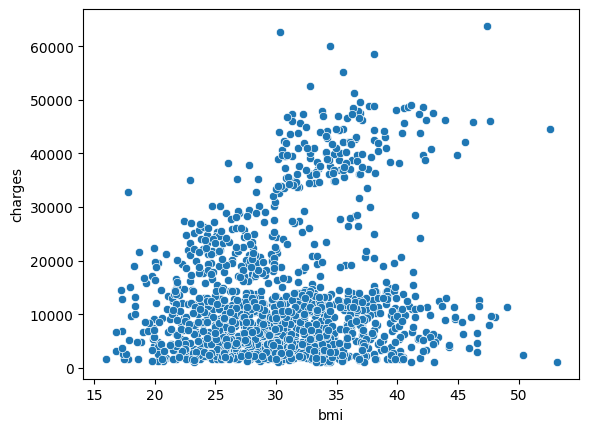

In [135]:
sns.scatterplot(df,x="bmi",y="charges")

### Does the average Age vary significantly across different Regions?

<Axes: xlabel='region', ylabel='age'>

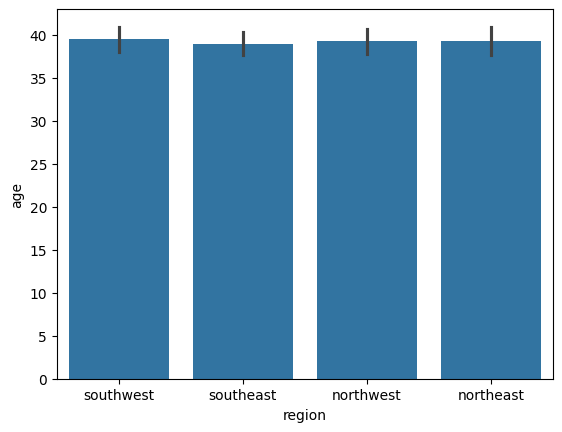

In [137]:
sns.barplot(df,x="region",y="age")

In [143]:
df.groupby("region")["age"].mean()

region
northeast    39.268519
northwest    39.196923
southeast    38.939560
southwest    39.455385
Name: age, dtype: float64

### What is the average BMI of a smoker vs. a non-smoker?

In [144]:
df.groupby("smoker")["bmi"].mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

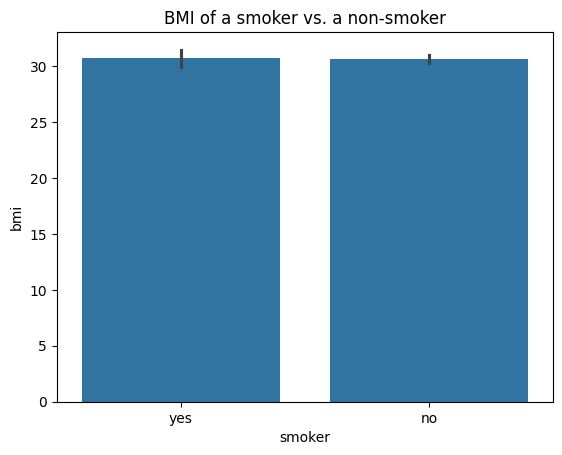

In [147]:
sns.barplot(df,x="smoker",y="bmi")
plt.title("BMI of a smoker vs. a non-smoker")
plt.show()

### Is there a correlation between Age and BMI?

<Axes: xlabel='age', ylabel='bmi'>

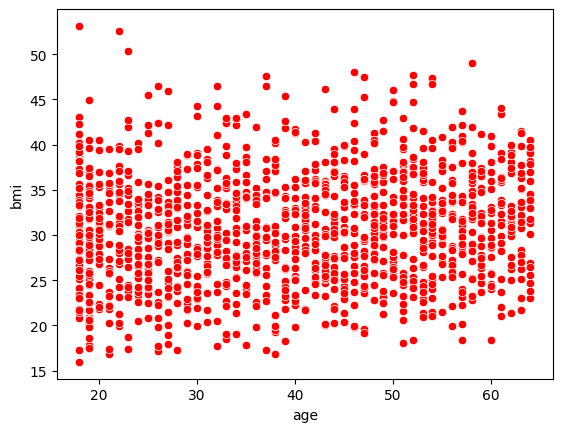

In [156]:
sns.scatterplot(df,x="age",y="bmi",color="red")

In [153]:
df.age.corr(df["bmi"])

np.float64(0.1092718815485352)

### Do people with more children tend to be older on average?

In [162]:
print(df.groupby('children')['age'].mean())

children
0    38.444251
1    39.453704
2    39.445833
3    41.566879
4    39.000000
5    35.611111
Name: age, dtype: float64


C:\Users\Subhan Ahmed Chandio\AppData\Local\Temp\ipykernel_6240\3182882695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="children", y="age", palette="coolwarm")


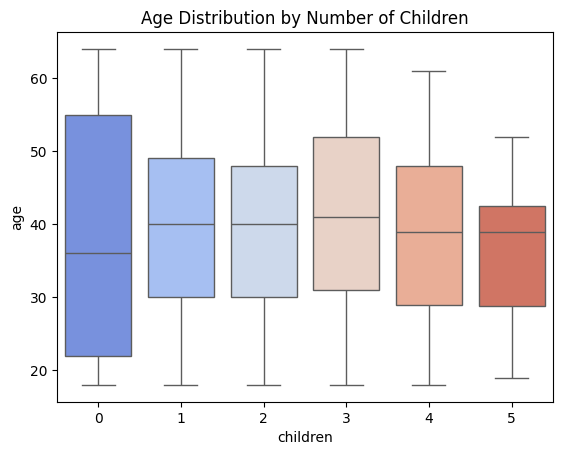

In [161]:
sns.boxplot(data=df, x="children", y="age", palette="coolwarm")
plt.title("Age Distribution by Number of Children")
plt.show()

## Multivariate Analysis (3+ Variables & Interactions)
### Generate a Correlation Heatmap for all numerical variables. Which has the strongest link to charges?

In [169]:
mat_corr = df.select_dtypes("number").corr()

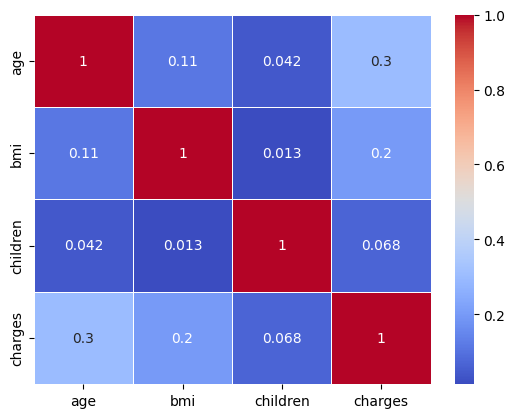

Age vs. Charges (~0.30): This is usually the strongest "pure" numerical correlation. As people get older, insurance costs tend to rise


In [175]:
sns.heatmap(mat_corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()
print("""Age vs. Charges (~0.30): This is usually the strongest "pure" numerical correlation. As people get older, insurance costs tend to rise""")

### Plot Age vs. Charges and color-code the points by Smoker status. What pattern emerges?

<Axes: xlabel='age', ylabel='charges'>

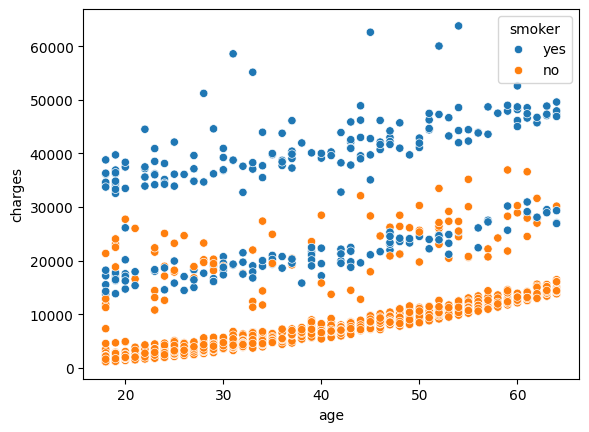

In [176]:
sns.scatterplot(df,x="age",y="charges",hue="smoker")

### How does the relationship between BMI and Charges change when you account for Smoker status?


<Axes: xlabel='bmi', ylabel='charges'>

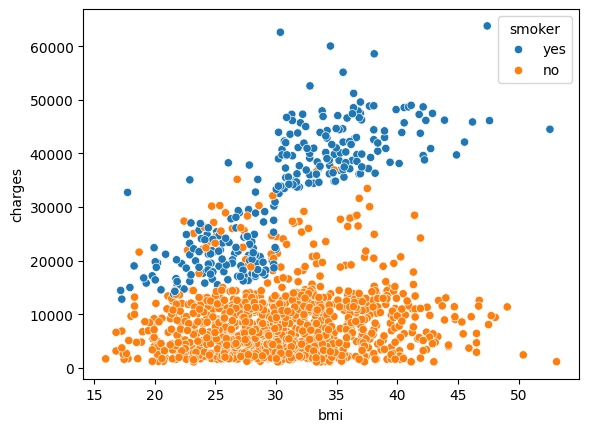

In [177]:
sns.scatterplot(df,x="bmi",y="charges",hue="smoker")

### Create a "pairplot" for the entire dataset. Which variable pairs show the clearest separation?

Variable with least separation: BMI and Children (they look like a messy cloud).


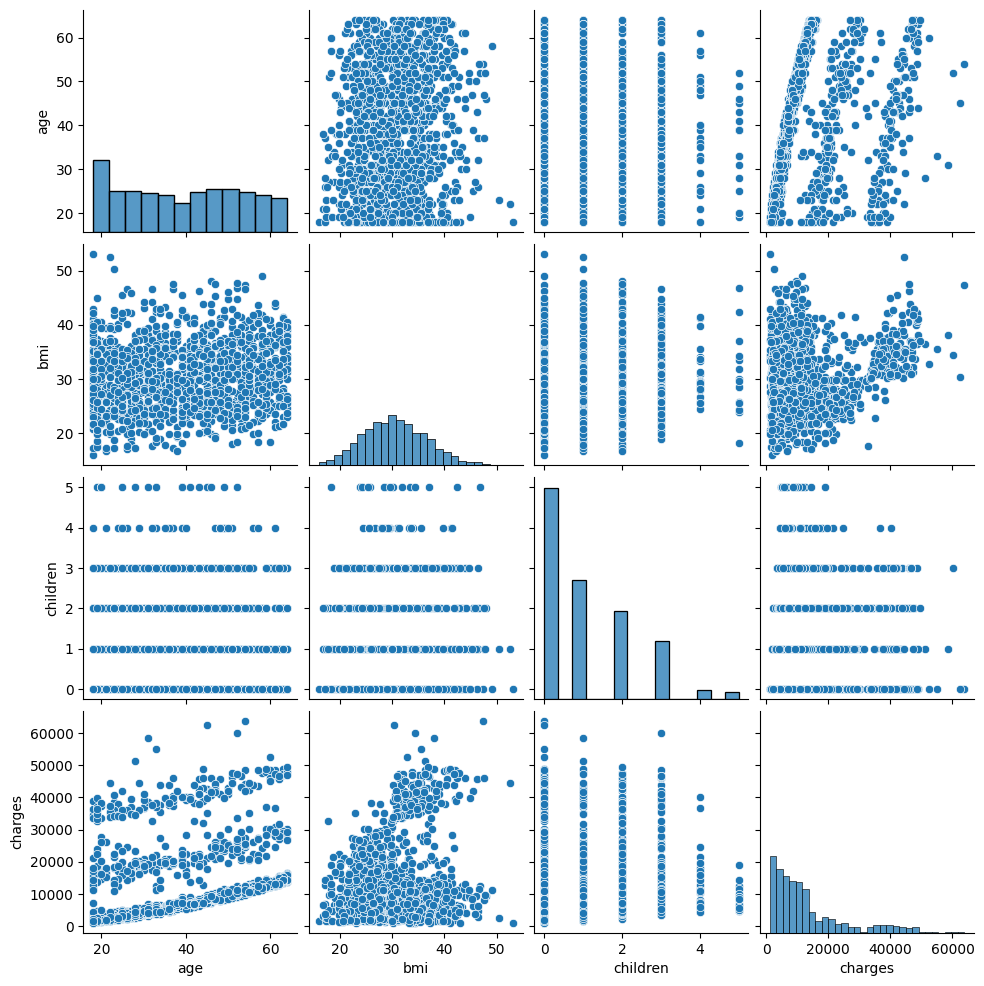

In [182]:
sns.pairplot(df)
print("Variable with least separation: BMI and Children (they look like a messy cloud).")

### What is the average Charge per Region, broken down by Smoker status?

<Axes: xlabel='region', ylabel='charges'>

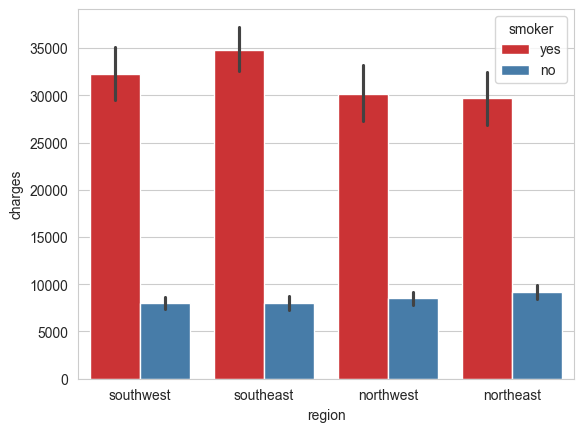

In [188]:
sns.barplot(data=df, x="region", y="charges", hue="smoker", palette="Set1")

### Use a violin plot to show Charges by Children count, split by Sex.

<Axes: xlabel='children', ylabel='charges'>

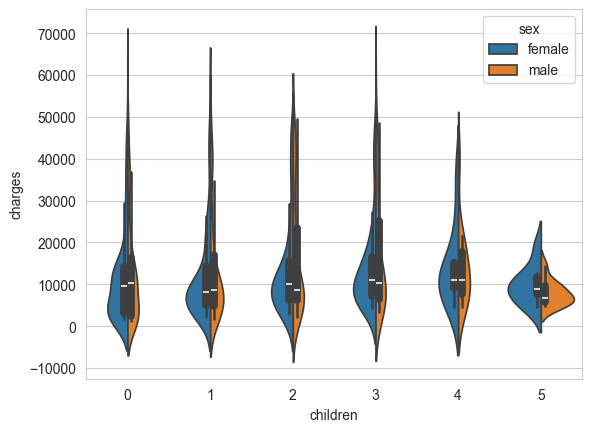

In [195]:
sns.violinplot(df,x="children",y="charges",hue="sex",split=True)

### Are older smokers more expensive to insure than younger smokers with higher BMIs?

<Axes: xlabel='age', ylabel='charges'>

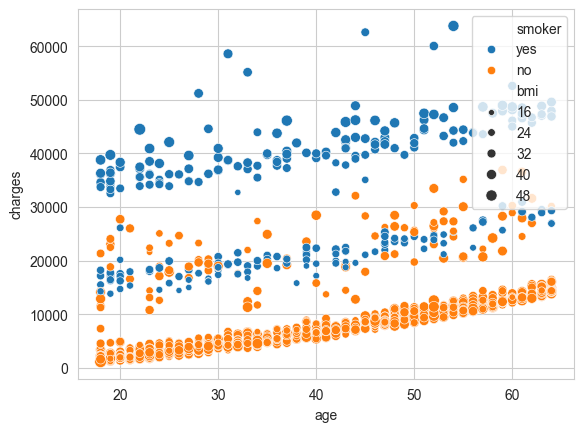

In [199]:
sns.scatterplot(df,x="age",y="charges",hue="smoker",size="bmi")

### Create a bubble chart: Age (x-axis), BMI (y-axis), and Charges (size of bubble).

In [202]:
import plotly.express as px
px.scatter(df,x="age",y="bmi",size="charges")

#### If you group the data by Region and Sex, which group has the highest median BMI?

In [214]:
df.groupby(["sex","region"])["bmi"].median().sort_values(ascending=False).idxmax()

('male', 'southeast')

<Axes: xlabel='region', ylabel='bmi'>

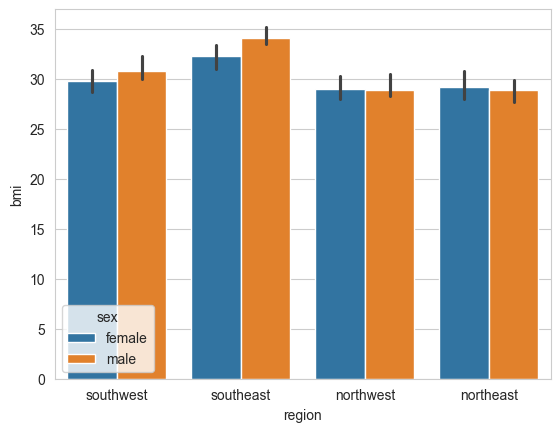

In [217]:
sns.barplot(df,x="region",y="bmi",hue="sex",estimator=np.median)